In [2]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis.analysis import Tools
from idanalysis import IDKickMap
import utils
from fieldmaptrack import Beam
from mathphys.functions import save_pickle, load_pickle


In [3]:
def get_fieldmap(phase, dgv):
    fmap_fname = Tools.get_fmap_fname(utils.ID_CONFIGS, utils.MEAS_DATA_PATH,
                                      config_keys=(phase, dgv),
                                      config_dict=utils.CONFIG_DICT)
    return Tools.get_fmap(fmap_fname)


In [4]:
def get_full_field(fmap):
    full_field = np.zeros((len(fmap.rx), len(fmap.rz), 3))
    full_field[:, :, 0]  = fmap.bx[0]
    full_field[:, :, 1]  = fmap.by[0]
    full_field[:, :, 2]  = fmap.bz[0]
    return full_field


In [5]:
def get_onaxis_field(rx, rz, fmap):
    full_field = get_full_field(rx, rz, fmap)
    field_onaxis = full_field[fmap.rx_zero,:, :]
    return field_onaxis


In [6]:
def get_kmap_meas(phase, dgv):
    folder_data = './results/measurements/'
    kmap_fname = Tools.get_kmap_filename(folder_data, shift_flag=False,     filter_flag=False, linear=False, meas_flag=True, phase=phase, dgv=dgv)
    idkickmap = IDKickMap(kmap_fname)
    return idkickmap


In [7]:
def get_kmap_model(phase, dgv):
    folder_data = './results/model/'
    kmap_fname = Tools.get_kmap_filename(folder_data, shift_flag=False,     filter_flag=False, linear=False, meas_flag=False, phase=phase, dgv=dgv)
    idkickmap = IDKickMap(kmap_fname)
    return idkickmap


In [9]:
def get_kmap_imas(phase, dgv, use_mf=False):

    if use_mf:
        ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-14_DeltaSabia_Phase01_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4836.kck'

        ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-14_DeltaSabia_Phase02_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4837.kck'

        ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-14_DeltaSabia_Phase03_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4838.kck'

        ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-15_DeltaSabia_Phase04_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4839.kck'

        ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-15_DeltaSabia_Phase05_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4840.kck'

        ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-15_DeltaSabia_Phase06_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4841.kck'

        ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/kickmaps/2023-09-15_DeltaSabia_Phase07_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4842.kck'

    else:

        ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-04_DeltaSabia_Phase01_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4818.kck'

        ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-04_DeltaSabia_Phase02_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4819.kck'

        ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-04_DeltaSabia_Phase03_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4820.kck'

        ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-04_DeltaSabia_Phase04_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4821.kck'

        ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-04_DeltaSabia_Phase05_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4822.kck'

        ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-04_DeltaSabia_Phase06_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4823.kck'

        ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE/kickmaps/2023-09-05_DeltaSabia_Phase07_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4824.kck'


    data_dict = {
        (0, 0): ph1, (0, 26.25): ph2,
        (-26.25, 26.25): ph3, (-13.125, 26.25): ph4,
        (0, 13.125): ph5, (-26.25, 13.125): ph6,
        (-13.125, 13.125): ph7
    }
    kmap_fname = data_dict[(phase, dgv)]

    idkickmap = IDKickMap(kmap_fname)
    return idkickmap


In [10]:
def get_field_integrals(phase, dgv, use_mf=False):

    if use_mf:
        ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph1_mf_230918_1430.dat'

        ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph2_mf_230918_1549.dat'


        ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph3_mf_230918_1709.dat'

        ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph4_mf_230919_0913.dat'

        ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph5_mf_230919_1223.dat'

        ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph6_mf_230919_1227.dat'

        ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph7_mf_230919_1343.dat'

    else:
        ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph1_230906_0844.dat'

        ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph2_230906_1005.dat'

        ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph3_230906_1156.dat'

        ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph4_230906_1335.dat'

        ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph5_230906_1501.dat'

        ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph6_230906_1620.dat'

        ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E/Delta_Sabia_Ph7_230911_0833.dat'

    data_dict = {
        (0, 0): ph1, (0, 26.25): ph2,
        (-26.25, 26.25): ph3, (-13.125, 26.25): ph4,
        (0, 13.125): ph5, (-26.25, 13.125): ph6,
        (-13.125, 13.125): ph7
    }

    data = data_dict[(phase, dgv)]

    file = open(data, 'r')
    x = list()
    I1x = list()
    I1y = list()
    I2x = list()
    I2y = list()
    for i, line in enumerate(file):
        columns= line.split('\t')
        if i > 0:
            x.append(float(columns[0]))
            I1x.append(float(columns[2]))
            I1y.append(float(columns[4]))
            I2x.append(float(columns[5]))
            I2y.append(float(columns[7]))

    # Closing files
    file.close()
    x = np.array(x)
    I1x = np.array(I1x)
    I1y = np.array(I1y)
    I2x = np.array(I2x)
    I2y = np.array(I2y)
    return x, I1x, I1y


In [11]:
def i1_2_kick(i1, brho):
    kick = i1 *1e-6
    return kick/brho


In [ ]:
phase, dgv = -26.25, 26.25
use_mf = False

idkickmap = get_kmap_meas(phase, dgv)
beam = Beam(energy=3)
brho = beam.brho

rx0 = idkickmap.posx
ry0 = idkickmap.posy
fposx = idkickmap.fposx
fposy = idkickmap.fposy
kickx = idkickmap.kickx
kicky = idkickmap.kicky

rxf = fposx[0, :]
ryf = fposy[0, :]
pxf = kickx[0, :]/brho**2
pyf = kicky[0, :]/brho**2

idkickmap_imas = get_kmap_imas(phase, dgv, use_mf)

rx0_imas = idkickmap_imas.posx
ry0_imas = idkickmap_imas.posy
fposx_imas = idkickmap_imas.fposx
fposy_imas = idkickmap_imas.fposy
kickx_imas = idkickmap_imas.kickx
kicky_imas = idkickmap_imas.kicky

rxf_imas = fposx_imas[0, :]
ryf_imas = fposy_imas[0, :]
pxf_imas = kickx_imas[0, :]/brho**2
pyf_imas = kicky_imas[0, :]/brho**2


In [ ]:
p = str(int(np.modf(np.abs(phase))[-1]))
gv = str(int(np.modf(np.abs(dgv))[-1]))
kmap_fname = './results/model/kickmaps/fitted_model/kickmap_errors_phase_{}_dgv_{}.txt'.format(p, gv)

idkickmap_error_model = IDKickMap(kmap_fname)

rx0_errors = idkickmap_error_model.posx
ry0_errors = idkickmap_error_model.posy
fposx_errors = idkickmap_error_model.fposx
fposy_errors = idkickmap_error_model.fposy
kickx_errors = idkickmap_error_model.kickx
kicky_errors = idkickmap_error_model.kicky

rxf_errors = fposx_errors[0, :]
ryf_errors = fposy_errors[0, :]
pxf_errors = kickx_errors[0, :]/brho**2
pyf_errors = kicky_errors[0, :]/brho**2

p = str(int(np.modf(np.abs(phase))[-1]))
gv = str(int(np.modf(np.abs(dgv))[-1]))
kmap_fname = './results/model/kickmaps/fitted_model/kickmap_errors_phase_{}_dgv_{}_midplane.txt'.format(p, gv)

idkickmap_error_plane = IDKickMap(kmap_fname)

rx0_plane = idkickmap_error_plane.posx
ry0_plane = idkickmap_error_plane.posy
fposx_plane = idkickmap_error_plane.fposx
fposy_plane = idkickmap_error_plane.fposy
kickx_plane = idkickmap_error_plane.kickx
kicky_plane = idkickmap_error_plane.kicky

rxf_plane = fposx_plane[0, :]
ryf_plane = fposy_plane[0, :]
pxf_plane = kickx_plane[0, :]/brho**2
pyf_plane = kicky_plane[0, :]/brho**2


In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(8)
fig.set_figheight(4)
axs[0].plot(1e3*rx0, 1e6*pxf, label='RK fieldmap')
axs[0].plot(1e3*rx0_imas, 1e6*pxf_imas, '-o', alpha=.7, label='RK fieldmap - imas')
axs[0].plot(1e3*rx0_errors, 1e6*pxf_errors, '-o', alpha=.7, label='Fitted model')
# axs[0].plot(1e3*rx0_plane, 1e6*pxf_plane, '-', alpha=.7, label='Fitted model - plane')


axs[0].set_ylabel('kick x [urad]')
axs[1].plot(1e3*rx0, 1e6*pyf, label='RK fieldmap')
axs[1].plot(1e3*rx0_imas, 1e6*pyf_imas, '-o', alpha=.7, label='RK fieldmap - imas')
axs[1].plot(1e3*rx0_errors, 1e6*pyf_errors, '-o', alpha=.7, label='Fitted model')
# axs[1].plot(1e3*rx0_plane, 1e6*pyf_plane, '-', alpha=.7, label='Fitted model - plane')

axs[0].legend()
axs[1].legend()
axs[1].set_ylabel('kick y [urad]')
fig.tight_layout()
plt.legend()


In [ ]:
x, I1x, I1y = get_field_integrals(phase, dgv, use_mf)

py_sw = -1*i1_2_kick(I1x, brho)
px_sw = -1*i1_2_kick(I1y, brho)


In [ ]:
fmap = get_fieldmap(phase, dgv)
fmap_field = get_full_field(fmap)
z = fmap.rz*1e-3

kickx_ifmap = np.zeros(len(fmap.rx))
kicky_ifmap = np.zeros(len(fmap.rx))

for i, x_ in enumerate(fmap.rx):
    bx = fmap_field[i, :, 0]
    i1x = np.trapz(z, bx)
    kicky_ifmap[i] = 1e6*i1x/brho

    by = fmap_field[i, :, 1]
    i1y = np.trapz(z, by)
    kickx_ifmap[i] = 1e6*i1y/brho


In [ ]:
def create_model(phase, dgv, apply_mag):
    model = utils.generate_radia_model(
                        phase=phase,
                        dgv=dgv,
                        apply_mag=apply_mag)
    return model


In [ ]:
delta = create_model(phase=phase, dgv=dgv, apply_mag=True)
kickx_idelta = np.zeros(len(fmap.rx))
kicky_idelta = np.zeros(len(fmap.rx))
for i, x_ in enumerate(fmap.rx):
    field = delta.get_field(x=x_, y=0, z=fmap.rz, nproc=24)

    bx = field[:, 0]
    i1x = np.trapz(z, bx)
    kicky_idelta[i] = 1e6*i1x/brho

    by = field[:, 1]
    i1y = np.trapz(z, by)
    kickx_idelta[i] = 1e6*i1y/brho


In [ ]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('lin V; K max')
fig.set_figwidth(8)
fig.set_figheight(4)
axs[0].plot(fmap.rx, kickx_ifmap, '.-', label='Fieldmap integral', color='C0')
axs[0].plot(x, 1e6*px_sw, '.-', label='Stretched Wire', color='C2')
axs[0].plot(fmap.rx, kickx_idelta, '.-', label='Fitted model integral', color='C1')
axs[0].set_ylabel('kick x [urad]')

axs[1].plot(fmap.rx, kicky_ifmap, '.-', label='Fieldmap integral', color='C0')
axs[1].plot(x, 1e6*py_sw, '.-', label='Stretched Wire', color='C2')
axs[1].plot(fmap.rx, kicky_idelta, '.-', label='Fitted model integral', color='C1')



axs[0].legend()
axs[1].legend()
axs[1].set_ylabel('kick y [urad]')
axs[1].set_xlabel('rx [mm]')
axs[0].set_xlabel('rx [mm]')
fig.tight_layout()
plt.savefig('field_integrals_fitting.png')


In [ ]:
from imaids.models import DeltaSabia
from imaids.fieldsource import FieldModel
from imaids.magicfingers import MagicFingersSabia
import radia as rad

def create_d52_with_mf(phase, dgv):

    undulator_movement_dict = {
        (0, 0): {},
        (0, 26.25): {'dgv': 26.25, 'dp': 0},
        (-26.25, 26.25): {'dgv': 26.25, 'dp': -26.25},
        (-13.125, 26.25): {'dgv': 26.25, 'dp': -13.125},
        (0, 13.125): {'dgv': 13.125, 'dp': 0},
        (-26.25, 13.125): {'dgv': 13.125, 'dp': -26.25},
        (-13.125, 13.125): {'dgv': 13.125, 'dp': -13.125}
        }

    # --------------- Define shifts list --------------- #

    shifts = [-2, -2, -2, -2, 2, 2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2]

    block_shift_list = [[0, y, 0] for y in shifts]

    # ----------- Define magnetizations list ----------- #

    magnetizations = ['u', 'b', 'f', 'd', 'f', 'f', 'd', 'f', 'd', 'b', 'u',
                      'b', 'f', 'f', 'f', 'u']

    def label_mag(label, mr):
        if label == 'u':
            return [0, mr, 0]  # "up"
        if label == 'd':
            return [0, -1*mr, 0]  # "down"
        if label == 'f':
            return [0, 0, mr]  # "forward"
        if label == 'b':
            return [0, 0, -1*mr]  # "backward"

    magnetization_init_list = [label_mag(m, 1.37) for m in magnetizations]
    magnetization_init_list = np.array(magnetization_init_list)
    magnetization_init_list = magnetization_init_list.reshape(16, 3).tolist()

    # ------------ Create undulator object ------------- #

    und = DeltaSabia()

    p = str(int(np.modf(np.abs(phase))[-1]))
    gv = str(int(np.modf(np.abs(dgv))[-1]))
    mag_fname = './mags/p{}_dgv{}.pickle'.format(p, gv)
    mag_dict = load_pickle(mag_fname)

    und.create_radia_object(magnetization_dict=mag_dict)
    undulator_movement_kwargs = undulator_movement_dict[(phase, dgv)]
    und.set_cassete_positions(**undulator_movement_kwargs)

    # ---------- Create magic fingers objects ---------- #

    dist_cas = 21.5
    magicpos = (und.cassettes['cse'].longitudinal_position_list[-1] +
                11.2662 + dist_cas)
    # Magic fingers position to coordinates origin:
    # = position of last block
    # + half width of the last block
    # + distance between magic fingers block center
    #   and face of cassette (end face of last block).

    magic1 = MagicFingersSabia(magnetization_init_list=magnetization_init_list,
                               block_shift_list=block_shift_list,
                               device_position=-magicpos)

    magic2 = MagicFingersSabia(magnetization_init_list=magnetization_init_list,
                               block_shift_list=block_shift_list,
                               device_position=magicpos)

    dp = undulator_movement_kwargs.get('dp', 0)
    dgv = undulator_movement_kwargs.get('dgv', 0)
    # Movement of four magic fingers block sets from dp and dgv.
    magic_movement_list = [0, dp+dgv, dgv, dp]

    magic1.group_shift_list = magic_movement_list
    magic2.group_shift_list = magic_movement_list

    # ---------------- Create container ---------------- #

    # Display colors differentiating magic fingers and undulator.
    rad.ObjDrwAtr(und.radia_object, [0.7, 0.7, 0.7], 0.001)
    rad.ObjDrwAtr(magic1.radia_object, [0, 0.5, 1], 0.001)
    rad.ObjDrwAtr(magic2.radia_object, [0, 0.5, 1], 0.001)

    container = rad.ObjCnt([magic1.radia_object,
                            magic2.radia_object,
                            und.radia_object])

    return container


In [ ]:
full_device = create_d52_with_mf(phase, dgv)
delta = FieldModel(full_device)
kickx_idelta_mf = np.zeros(len(fmap.rx))
kicky_idelta_mf = np.zeros(len(fmap.rx))
for i, x_ in enumerate(fmap.rx):
    field = delta.get_field(x=x_, y=0, z=fmap.rz, nproc=24)

    bx = field[:, 0]
    i1x = np.trapz(z, bx)
    kicky_idelta_mf[i] = 1e6*i1x/brho

    by = field[:, 1]
    i1y = np.trapz(z, by)
    kickx_idelta_mf[i] = 1e6*i1y/brho


In [ ]:
use_mf = True
x, I1x, I1y = get_field_integrals(phase, dgv, use_mf)

py_sw_mf = -1*i1_2_kick(I1x, brho)
px_sw_mf = -1*i1_2_kick(I1y, brho)


In [8]:
def get_fmap_fname_mf(phase, dgv):

    ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-14_DeltaSabia_Phase01_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4836.dat'

    ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-14_DeltaSabia_Phase02_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4837.dat'

    ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-14_DeltaSabia_Phase03_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4838.dat'

    ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase04_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4839.dat'

    ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase05_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4840.dat'

    ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase06_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4841.dat'

    ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase07_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4842.dat'

    data_dict = {
        (0, 0): ph1, (0, 26.25): ph2,
        (-26.25, 26.25): ph3, (-13.125, 26.25): ph4,
        (0, 13.125): ph5, (-26.25, 13.125): ph6,
        (-13.125, 13.125): ph7
    }

    fmap_fname = data_dict[(phase, dgv)]
    return fmap_fname


In [9]:
fmap_fname = get_fmap_fname_mf(phase, dgv)
fmap = Tools.get_fmap(fmap_fname)
fmap_field = get_full_field(fmap)
z = fmap.rz*1e-3

kickx_ifmap_mf = np.zeros(len(fmap.rx))
kicky_ifmap_mf = np.zeros(len(fmap.rx))

for i, x_ in enumerate(fmap.rx):
    bx = fmap_field[i, :, 0]
    i1x = np.trapz(z, bx)
    kicky_ifmap_mf[i] = 1e6*i1x/brho

    by = fmap_field[i, :, 1]
    i1y = np.trapz(z, by)
    kickx_ifmap_mf[i] = 1e6*i1y/brho


NameError: name 'phase' is not defined

NameError: name 'fmap' is not defined

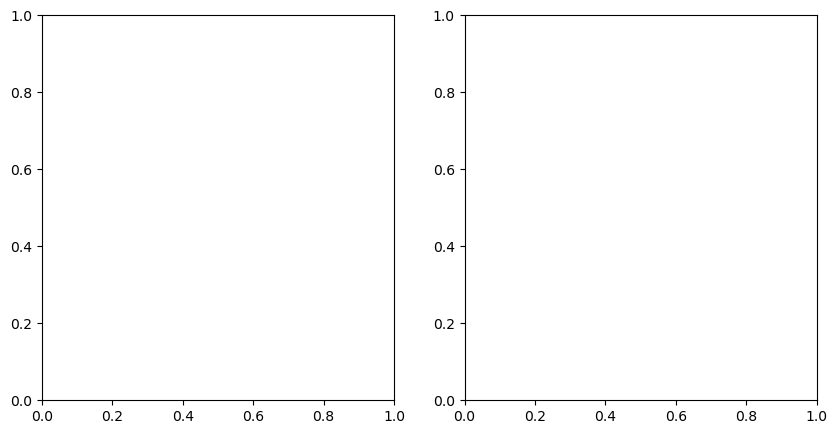

In [10]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.set_figheight(5)
axs[0].plot(fmap.rx, kickx_ifmap_mf, label='Fieldmap integral + MF')
axs[0].plot(fmap.rx, kickx_idelta_mf, label='Fitted model integral + MF')
axs[0].plot(x, 1e6*px_sw_mf, label='SW integral + MF')

axs[0].plot(fmap.rx, kickx_ifmap, '-o', alpha=.5, color='C0', label='Fieldmap integral')
axs[0].plot(fmap.rx, kickx_idelta, '-o', alpha=.5, color='C1', label='Fitted model integral')
axs[0].plot(x, 1e6*px_sw, '-o', alpha=.5, color='C2', label='SW integral')

axs[0].set_ylabel('kick x [urad]')

axs[1].plot(fmap.rx, kicky_ifmap_mf, label='Fieldmap integral + MF')
axs[1].plot(fmap.rx, kicky_idelta_mf, label='Fitted model integral + MF')
axs[1].plot(x, 1e6*py_sw_mf, label='SW integral + MF')

axs[1].plot(fmap.rx, kicky_ifmap, '-o', alpha=.5, color='C0', label='Fieldmap integral')
axs[1].plot(fmap.rx, kicky_idelta, '-o', alpha=.5, color='C1', label='Fitted model integral')
axs[1].plot(x, 1e6*py_sw, '-o', alpha=.5, color='C2', label='SW integral')




axs[0].legend()
axs[1].legend()
axs[0].set_xlabel('rx [mm]')
axs[1].set_xlabel('rx [mm]')
axs[1].set_ylabel('kick y [urad]')
fig.tight_layout()


In [11]:
def get_field_integrals(phase, dgv):

    ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph1_mf_230918_1430.dat'

    ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph2_mf_230918_1549.dat'


    ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph3_mf_230918_1709.dat'

    ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph4_mf_230919_0913.dat'

    ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph5_mf_230919_1223.dat'

    ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph6_mf_230919_1227.dat'

    ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph7_mf_230919_1343.dat'

    ph41= '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph41_mf_230919_1642.dat'

    ph71 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_shimming_E_magic_fingers/Delta_Sabia_Ph71_mf_230920_0806.dat'

    data_dict = {
        (0, 0): ph1, (0, 26.25): ph2,
        (-26.25, 26.25): ph3, (-13.125, 26.25): ph4,
        (0, 13.125): ph5, (-26.25, 13.125): ph6,
        (-13.125, 13.125): ph7,
        (13.125, 26.25): ph41,
        (13.125, 13.125): ph71,
    }

    data = data_dict[(phase, dgv)]

    file = open(data, 'r')
    x = list()
    I1x = list()
    I1y = list()
    I2x = list()
    I2y = list()
    for i, line in enumerate(file):
        columns= line.split('\t')
        if i > 0:
            x.append(float(columns[0]))
            I1x.append(float(columns[2]))
            I1y.append(float(columns[4]))
            I2x.append(float(columns[5]))
            I2y.append(float(columns[7]))

    # Closing files
    file.close()
    x = np.array(x)
    I1x = np.array(I1x)
    I1y = np.array(I1y)
    I2x = np.array(I2x)
    I2y = np.array(I2y)
    return x, I1x, I1y


In [12]:
# Phase
config_dict = dict()
config_dict[0] = [0, 13.125, 26.25]
config_dict[-13.125] = [13.125, 26.25]
config_dict[13.125] = [13.125, 26.25]
config_dict[-26.25] = [13.125, 26.25]


NameError: name 'i1_2_kick' is not defined

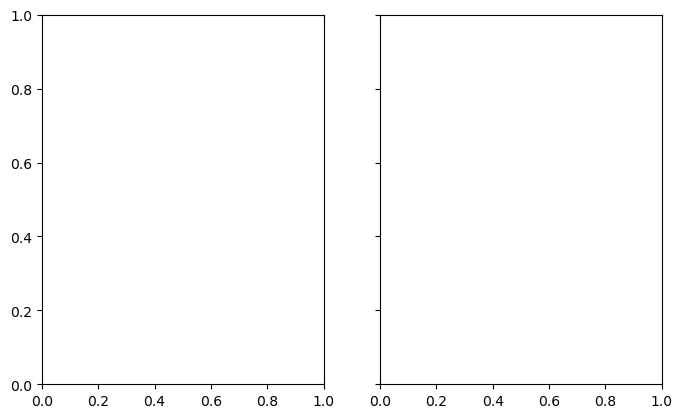

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(8)
phases = [0, -13.125, 13.125, -26.25]
label_ = ['Lin. H', 'Circ. N', 'Circ. P', 'Lin. V']
for j, phase in enumerate(phases):
    dgvs = np.array(config_dict[phase])
    py = np.zeros(len(dgvs))
    px = np.zeros(len(dgvs))
    for i, dgv in enumerate(dgvs):
        x, I1x, I1y = get_field_integrals(phase, dgv)
        idx0 = np.argmin(np.abs(x))
        py_ = -1*i1_2_kick(I1x, brho)[idx0]*1e6
        px_ = -1*i1_2_kick(I1y, brho)[idx0]*1e6
        px[i] = px_
        py[i] = py_
    axs[0].plot(dgvs/26.25, py, '.-', label=label_[j])
    axs[1].plot(dgvs/26.25, px, '.-', label=label_[j])
axs[0].set_xlabel('Normalized K')
axs[1].set_xlabel('Normalized K')
axs[0].grid()
axs[1].grid()
axs[0].set_ylabel('Bx integral [urad]')
axs[1].set_ylabel('By integral [urad]')
axs[0].legend()
fig.tight_layout()
plt.savefig('field_integrals_config.png')


In [14]:
def get_fmap_fname_mf(phase, dgv):

    ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4862.dat'

    ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=6.5625mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4863.dat'

    ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=13.125mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4864.dat'

    ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=19.6875mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4865.dat'

    ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinH/2023-10-25_DeltaSabia_Phase=0mm_GV=26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4866.dat'

    ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircN/2023-10-25_DeltaSabia_Phase=-13.125mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4867.dat'

    ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircN/2023-10-26_DeltaSabia_Phase=-13.125mm_GV=6.5625mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4868.dat'

    ph8 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircN/2023-10-26_DeltaSabia_Phase=-13.125mm_GV=13.125mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4869.dat'

    ph9 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircN/2023-10-26_DeltaSabia_Phase=-13.125mm_GV=19.6875mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4870.dat'

    ph10 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircN/2023-10-26_DeltaSabia_Phase=-13.125mm_GV=26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4871.dat'

    ph11 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinV/2023-10-26_DeltaSabia_Phase=-26.25mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4872.dat'

    ph12 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinV/2023-10-26_DeltaSabia_Phase=-26.25mm_GV=6.5625mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4873.dat'

    ph13 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinV/2023-10-26_DeltaSabia_Phase=-26.25mm_GV=13.125mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4874.dat'

    ph14 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinV/2023-10-26_DeltaSabia_Phase=-26.25mm_GV=19.6875mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4875.dat'

    ph15 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/LinV/2023-10-27_DeltaSabia_Phase=-26.25mm_GV=26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4876.dat'

    ph16 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircP/2023-10-27_DeltaSabia_Phase=13.125mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4877.dat'

    ph17 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircP/2023-10-27_DeltaSabia_Phase=13.125mm_GV=-6.5625mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4878.dat'

    ph18 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircP/2023-10-27_DeltaSabia_Phase=13.125mm_GV=-13.125mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4879.dat'

    ph19 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircP/2023-10-27_DeltaSabia_Phase=13.125mm_GV=-19.6875mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4880.dat'

    ph20 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircP/2023-10-27_DeltaSabia_Phase=13.125mm_GV=-26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4881.dat'

    ph21 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/zeroK/2023-10-27_DeltaSabia_Phase=6.5625mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4884.dat'

    ph22 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/zeroK/2023-10-27_DeltaSabia_Phase=-6.5625mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4882.dat'

    ph23 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/zeroK/2023-10-27_DeltaSabia_Phase=-19.6875mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4883.dat'


    data_dict = {
        (0, 0): ph1, (0, 6.5625): ph2,
        (0, 13.125): ph3, (0, 19.6875): ph4,
        (0, 26.25): ph5,

        (-13.125, 0): ph6, (-13.125, 6.5625): ph7,
        (-13.125, 13.125): ph8, (-13.125, 19.6875): ph9,
        (-13.125, 26.25): ph10,

        (-26.25, 0): ph11, (-26.25, 6.5625): ph12,
        (-26.25, 13.125): ph13, (-26.25, 19.6875): ph14,
        (-26.25, 26.25): ph15,

        (13.125, 0): ph16, (13.125, 6.5625): ph17,
        (13.125, 13.125): ph18, (13.125, 19.6875): ph19,
        (13.125, 26.25): ph20,

        (6.5625, 0): ph21,
        (-6.5625, 0): ph22,
        (-19.6875, 0): ph23,
    }

    fmap_fname = data_dict[(phase, dgv)]
    return fmap_fname


In [15]:
phase=0
dgv=0

def get_fmap_integrals(phase, dgv):
    beam = Beam(energy=3)
    brho = beam.brho

    fmap_fname = get_fmap_fname_mf(phase, dgv)
    fmap = Tools.get_fmap(fmap_fname)
    fmap_field = get_full_field(fmap)
    z = fmap.rz*1e-3

    kickx = np.zeros(len(fmap.rx))
    kicky = np.zeros(len(fmap.rx))

    for i, x_ in enumerate(fmap.rx):
        bx = fmap_field[i, :, 0]
        i1x = np.trapz(z, bx)
        kicky[i] = 1e6*i1x/brho

        by = fmap_field[i, :, 1]
        i1y = np.trapz(z, by)
        kickx[i] = 1e6*i1y/brho

    idx0 = np.argmin(np.abs(fmap.rx))

    return kickx[idx0], kicky[idx0]


In [16]:
# Phase
config_dict = dict()
config_dict[-26.25] = [0, 6.5625, 13.125, 19.6875, 26.25]
config_dict[-19.6875] = [0]
config_dict[-13.125] = [0, 6.5625, 13.125, 19.6875, 26.25]
config_dict[-6.5625] = [0]
config_dict[0] = [0, 6.5625, 13.125, 19.6875, 26.25]
config_dict[6.5625] = [0]
config_dict[13.125] = [0, 6.5625, 13.125, 19.6875, 26.25]


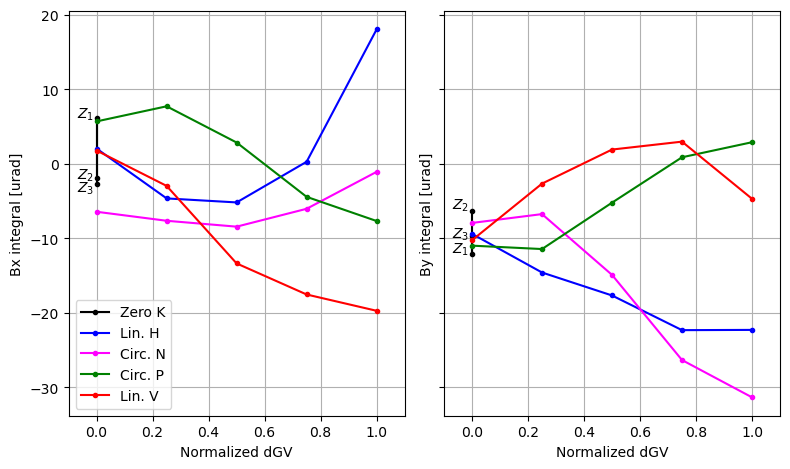

In [17]:
fig, axs = plt.subplots(1, 2, sharey=True)
fig.set_figwidth(8)
phases = [0, -13.125, 13.125, -26.25]
label_ = ['Lin. H', 'Circ. N', 'Circ. P', 'Lin. V']
color_list = ['blue', 'magenta', 'green', 'red']

py = np.zeros(3)
px = np.zeros(3)
for i, phase in enumerate([-6.5625, 6.5625, -19.6875]):
    px_, py_ = get_fmap_integrals(phase, 0)
    px[i] = px_
    py[i] = py_

axs[0].plot([0, 0, 0], py, '.-', label='Zero K', color='black')
axs[1].plot([0, 0, 0], px, '.-', label='Zero K', color='black')


for j, phase in enumerate(phases):
    dgvs = np.array(config_dict[phase])
    py = np.zeros(len(dgvs))
    px = np.zeros(len(dgvs))
    for i, dgv in enumerate(dgvs):
        px_, py_ = get_fmap_integrals(phase, dgv)
        px[i] = px_
        py[i] = py_
    axs[0].plot(dgvs/26.25, py, '.-', label=label_[j], color=color_list[j])
    axs[1].plot(dgvs/26.25, px, '.-', label=label_[j], color=color_list[j])
axs[0].set_xlabel('Normalized dGV')
axs[1].set_xlabel('Normalized dGV')
axs[0].set_xlim(-0.1, 1.1)
axs[1].set_xlim(-0.1, 1.1)
axs[0].grid()
axs[1].grid()

axs[0].text(-.07, 6.2, r'$Z_{1}$', color='black', fontsize=10, fontstyle='oblique')
axs[0].text(-.07, -2.0, r'$Z_{2}$', color='black', fontsize=10, fontstyle='oblique')
axs[0].text(-.07, -3.8, r'$Z_{3}$', color='black', fontsize=10, fontstyle='oblique')


axs[1].text(-.07, -12.0, r'$Z_{1}$', color='black', fontsize=10, fontstyle='oblique')
axs[1].text(-.07, -6.0, r'$Z_{2}$', color='black', fontsize=10, fontstyle='oblique')
axs[1].text(-.07, -10, r'$Z_{3}$', color='black', fontsize=10, fontstyle='oblique')

axs[0].set_ylabel('Bx integral [urad]')
axs[1].set_ylabel('By integral [urad]')
axs[0].legend()
fig.tight_layout()
plt.savefig('field_integrals_config_new.png')


In [199]:
def get_fmap_fname_mf_old(phase, dgv):

    ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-14_DeltaSabia_Phase01_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4836.dat'

    ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-14_DeltaSabia_Phase02_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4837.dat'

    ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-14_DeltaSabia_Phase03_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4838.dat'

    ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase04_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4839.dat'

    ph5 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase05_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4840.dat'

    ph6 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase06_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4841.dat'

    ph7 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_shimmingE_magic_fingers/2023-09-15_DeltaSabia_Phase07_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_ID=4842.dat'

    data_dict = {
        (0, 0): ph1, (0, 26.25): ph2,
        (-26.25, 26.25): ph3, (-13.125, 26.25): ph4,
        (0, 13.125): ph5, (-26.25, 13.125): ph6,
        (-13.125, 13.125): ph7
    }

    fmap_fname = data_dict[(phase, dgv)]
    return fmap_fname


In [200]:
%matplotlib qt5
fmap_fname_old = get_fmap_fname_mf_old(phase=-13.125, dgv=26.25)
fmap = Tools.get_fmap(fmap_fname_old)
fmap_field_old = get_full_field(fmap)
print(fmap.rx)


[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [201]:
fmap_fname_new = Tools.get_fmap_fname(utils.ID_CONFIGS, meas_data_path=utils.MEAS_DATA_PATH, config_keys=(-13.125, 26.25), config_dict=utils.CONFIG_DICT)


ID4871


In [245]:
fmap_fname_new = Tools.get_fmap_fname(utils.ID_CONFIGS, meas_data_path=utils.MEAS_DATA_PATH, config_keys=(-13.125, 26.25), config_dict=utils.CONFIG_DICT)
fmap = Tools.get_fmap(fmap_fname_new)
fmap_field_new = get_full_field(fmap)


ID4871


In [217]:
fmap.rx[6]


1.0

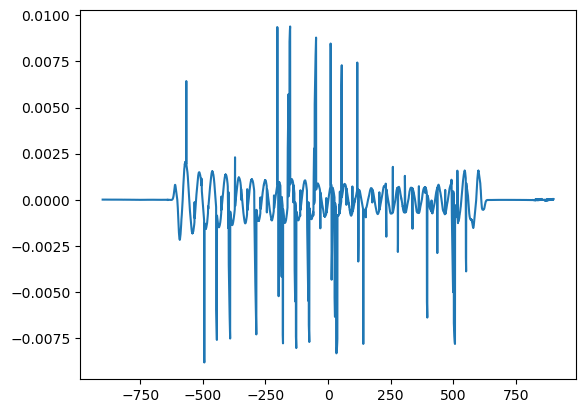

In [246]:
bx_old = fmap_field_old[6, :, 0]
bx_new = fmap_field_new[6, :, 0]

plt.figure(1)
plt.plot(fmap.rz, bx_new - bx_old)


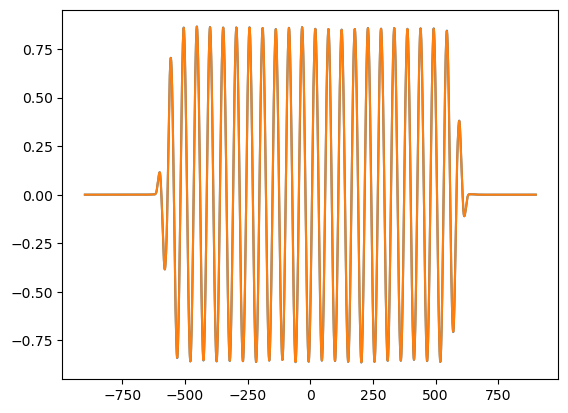

In [247]:
plt.figure(2)
plt.plot(fmap.rz, bx_new)
plt.plot(fmap.rz, bx_old)


In [248]:
for i, x in enumerate(fmap.rx):
    print(x, 1e4*np.mean(fmap_field_new[i, :, 0] - fmap_field_old[i, :, 0]))


-5.0 -0.09878191437850556
-4.0 -0.11062054130518824
-3.0 -0.12036104889141805
-2.0 -0.08369872298932911
-1.0 -0.23521098135822424
0.0 -0.14470041786198265
1.0 -1.3169981033271376
2.0 -0.1397821362540926
3.0 -0.12325169521354944
4.0 -0.12508672618133093
5.0 -0.15676469812690702


In [249]:
for i, x in enumerate(fmap.rx):
    print(x, 1e4*np.mean(fmap_field_new[i, :, 2] ))


-5.0 -0.08758266796445198
-4.0 -0.05591411013607114
-3.0 -0.03040799332993395
-2.0 -0.034100443577872425
-1.0 0.0012232703982225515
0.0 0.017467639721187117
1.0 0.03920716618164437
2.0 0.057518614382199136
3.0 0.10491415183282572
4.0 0.13972838013856667
5.0 0.1922623869375368


In [250]:
print(np.mean(fmap_field_new[6, :, 0]))
print(np.mean(fmap_field_new[5, :, 0]))
print(np.mean(fmap_field_new[7, :, 0]))


-0.0001304992956331894
1.6784631948373426e-05
1.22658755650118e-05


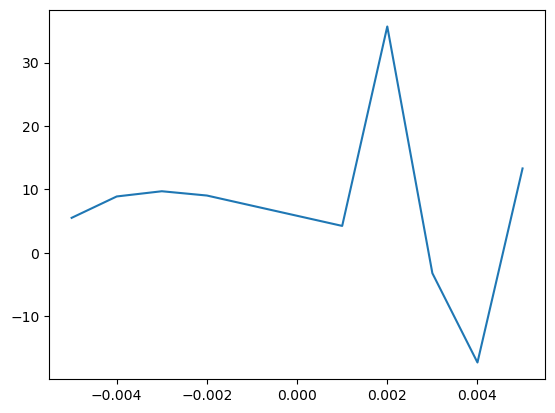

In [243]:
def get_kmap_fname(phase, dgv):


    ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircN/kickmaps/2023-10-26_DeltaSabia_Phase=-13.125mm_GV=26.25mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4871.kck'

    ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/CircP/kickmaps/2023-10-27_DeltaSabia_Phase=13.125mm_GV=-6.5625mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4878.kck'

    ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/zeroK/kickmaps/2023-10-27_DeltaSabia_Phase=-6.5625mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4882.kck'

    ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/hallprobe/delta_sabia_final/zeroK/kickmaps/2023-10-27_DeltaSabia_Phase=6.5625mm_GV=0mm_Fieldmap_Corrected_X=-5_5mm_Z=-900_900mm_Y=0mm_ID=4884.kck'


    data_dict = {
            (-13.125, 26.25): ph1,
            (13.125, 6.5625): ph2,
            (-6.5625, 0): ph3,
            (6.5625, 0): ph4,
        }
    return data_dict[(phase, dgv)]

phase = 13.125
dgv = 6.5625
kmap_fname = get_kmap_fname(phase, dgv)

idkickmap = IDKickMap(kmap_fname=kmap_fname)
plt.plot(idkickmap.posx, 1e6*idkickmap.kicky[0,:]/100)


In [238]:
def get_sw_fname(phase, dgv):


    ph1 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_final/Delta_Sabia_Final_GV=26.25_PH=-13.125_231029_1618.dat'

    ph2 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_final/Delta_Sabia_Final_GV=-6.562_PH=13.125_231029_1217.dat'

    ph3 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_final/Delta_Sabia_Final_GV=0_PH=-6.562_231029_2005.dat'

    ph4 = '/opt/lnls-ima/delta52/id-sabia/model-03/measurement/magnetic/stretchedwire/delta_sabia_final/Delta_Sabia_Final_GV=0_PH=6.562_231030_1017.dat'


    data_dict = {
            (-13.125, 26.25): ph1,
            (13.125, 6.5625): ph2,
            (-6.5625, 0): ph3,
            (6.5625, 0): ph4,
        }
    return data_dict[(phase, dgv)]

fname = get_sw_fname(phase, dgv)
file = open(fname, 'r')
x = list()
I1x = list()
I1y = list()
I2x = list()
I2y = list()
for i, line in enumerate(file):
    columns= line.split('\t')

    if i > 0:
        x.append(float(columns[0]))
        I1x.append(float(columns[2]))
        I1y.append(float(columns[4]))
        I2x.append(float(columns[5]))
        I2y.append(float(columns[7]))

# Closing files
file.close()
x = np.array(x)
print(x.shape)
I1x = np.array(I1x)
I1y = np.array(I1y)
I2x = np.array(I2x)
I2y = np.array(I2y)

if phase == -13.125:
    x = x.reshape(3, 11)
    I1x = I1x.reshape(3, 11)
    I2x = I2x.reshape(3, 11)
    I1y = I1y.reshape(3, 11)
    I2y = I2y.reshape(3, 11)


(33,)


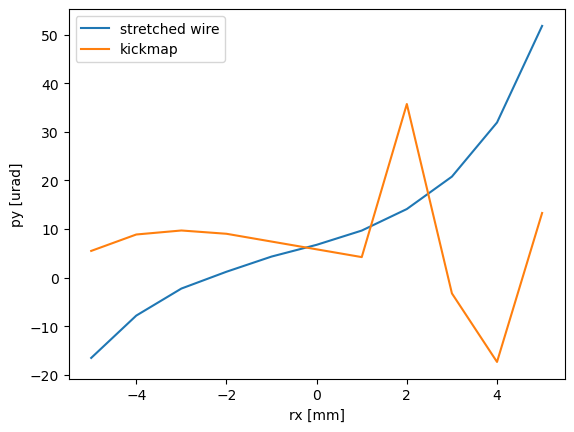

In [244]:
py_sw = -1*i1_2_kick(I1x, brho)
plt.plot(x[0, :], 1e6*py_sw[0,:], label='stretched wire')
plt.plot(1e3*idkickmap.posx, 1e6*idkickmap.kicky[0,:]/100, label='kickmap')
plt.xlabel('rx [mm]')
plt.ylabel('py [urad]')
plt.legend()


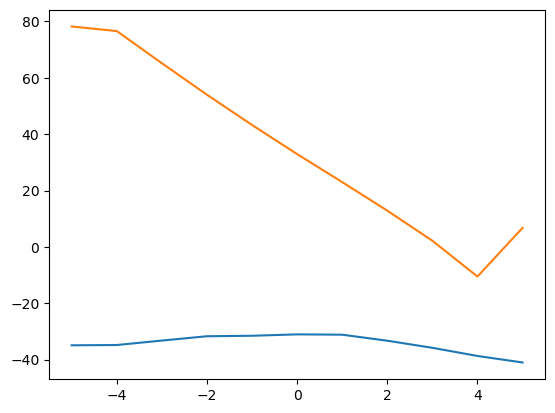

In [198]:
px_sw = -1*i1_2_kick(I1y, brho)
plt.plot(x[0, :], 1e6*px_sw[0, :])
plt.plot(1e3*idkickmap.posx, 1e6*idkickmap.kickx[0,:]/100)


In [120]:
fmap_fname_new = Tools.get_fmap_fname(utils.ID_CONFIGS, meas_data_path=utils.MEAS_DATA_PATH, config_keys=(-13.125, 26.25), config_dict=utils.CONFIG_DICT)
fmap = Tools.get_fmap(fmap_fname_new)
fmap_field_new = get_full_field(fmap)


ID4871


In [127]:
for i, x in enumerate(fmap.rx):
    print(x, np.mean(fmap_field_new[i, :, 0]))


-5.0 7.05057907313255e-05
-4.0 4.5322894222160116e-05
-3.0 2.3865978717021157e-05
-2.0 -9.116874317922322e-06
-1.0 7.065083797831609e-07
0.0 1.6784631948373426e-05
1.0 -0.0001304992956331894
2.0 1.22658755650118e-05
3.0 -2.7190829492920656e-05
4.0 -7.740314729714143e-05
5.0 -0.0001481488185653988


In [135]:
py_f = list()
for i, x in enumerate(fmap.rx):
    py_f.append(-1e5*np.trapz(y=fmap_field_new[i, :, 0], x=1e-3*fmap.rz))
plt.plot(py_f)


In [161]:
idx_rx0 = np.argmin(np.abs(fmap.rx))

idx_rz0 = np.argmin(np.abs(fmap.rz))
idx_p = np.argmin(np.abs(fmap.rz - utils.ID_PERIOD))

bx = np.array(fmap.bx)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
by = np.array(fmap.by)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
bz = np.array(fmap.bz)[0, idx_rx0, 2*idx_rz0-idx_p:idx_p]
rz = fmap.rz[2*idx_rz0-idx_p:idx_p]

bx_max = np.max(bx)
by_max = np.max(by)
bz_max = np.max(bz)

idx_max_x = np.argmax(bx)
idx_max_y = np.argmax(by)
